In [165]:
import os
import pandas as pd
import h5py
dirname ='companies'
files = os.listdir(dirname)

In [177]:
sheet_name

'Data Sheet'

In [176]:
df = xl['Profit & Loss']

In [246]:
file = f'companies/{files[4]}'
xl = pd.read_excel(file, sheet_name=None)
sheets = list(xl.keys())
sheet_name = sheets[0]
df = xl[sheet_name]
df=df.apply(lambda x:x.str.strip())
df = df.set_index(df.columns[0])
df.columns=df.loc['Narration']
df= df.drop('Narration',axis=0)
df =df.replace('-', None)
df = df.dropna(how = 'all', axis =1)
df = df.dropna(how = 'all', axis =0)
df = df.fillna(0)
df = df.apply(lambda x : x.str.replace(',',''))
df = df.apply(lambda x : x.str.replace('%',''))
df =df.replace('', 0)
df = df[:-4]
df = df.fillna(0)
df = df.astype(float)
df[df.columns.dropna()]

Narration,Mar-20,Mar-21,Mar-22,Mar-23,Trailing,Best Case,Worst Case
NIYOGIN FINTECH LTD,,,,,,,
Sales,27.91,50.15,103.01,109.54,150.65,172.79,166.08
Expenses,48.31,52.25,108.43,137.40,176.89,172.79,166.08
Operating Profit,-20.40,-2.10,-5.42,-27.86,-26.24,172.79,166.08
Other Income,0.14,0.48,4.07,7.64,5.57,0.00,0.00
Depreciation,4.09,5.01,5.39,6.10,7.12,7.12,7.12
Interest,0.30,0.62,0.99,1.81,2.55,2.55,2.55
Profit before tax,-24.65,-7.25,-7.73,-28.13,-30.34,-9.67,-9.67
Tax,-0.13,0.17,-0.12,0.26,-1.69,0.00,0.00
Net profit,-23.91,-6.92,-5.93,-17.66,-19.43,-9.67,-9.67


Narration,Mar-16,Mar-17,Mar-18,Mar-19,Mar-20,Mar-21,Mar-22,Mar-23,Trailing,Best Case,Worst Case
ONE 97 COMMUNICATIONS LTD,,,,,,,,,,,
Sales,449.19,624.76,2982.22,3049.87,3115.10,2667.10,3892.40,6027.70,7202.80,9334.39,7116.22
Expenses,2168.83,2388.87,4685.36,7164.28,5579.79,4343.70,6187.90,7728.60,8263.50,9334.39,7116.22
Operating Profit,-1719.64,-1764.11,-1703.14,-4114.41,-2464.69,-1676.60,-2295.50,-1700.90,-1060.70,9334.39,7116.22
Other Income,233.68,931.60,308.32,250.72,-174.77,309.90,238.90,336.40,399.70,0.00,0.00
Depreciation,24.80,39.05,68.92,75.81,143.18,156.80,228.20,469.60,609.60,609.60,609.60
Interest,1.27,4.42,27.74,20.02,50.49,36.40,40.00,21.70,24.90,24.90,24.90
Profit before tax,-1512.03,-875.98,-1491.48,-3959.52,-2833.13,-1559.90,-2324.80,-1855.80,-1295.50,-634.50,-634.50
Tax,-1.70,3.65,-1.01,0.12,0.05,0.20,0.30,0.00,-1295.50,0.00,0.00
Net profit,-1510.33,-879.63,-1490.47,-3959.64,-2833.18,-1560.10,-2325.10,-1855.80,-1295.50,-634.50,-634.50


<Axes: xlabel='Narration'>

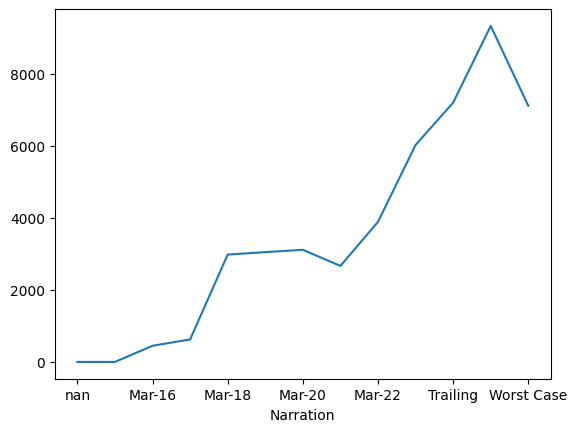

In [208]:
df.loc['Sales'].astype(float).plot()

In [203]:
df['Sales']

KeyError: 'Sales'

In [115]:
.iloc[1:-2,:].astype(float)

Narration,NaN,NaN,Mar-16,Mar-17,Mar-18,Mar-19,Mar-20,Mar-21,Mar-22,Mar-23
ONE 97 COMMUNICATIONS LTD,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Narration,NaN,NaN,Mar-16,Mar-17,Mar-18,Mar-19,Mar-20,Mar-21,Mar-22,Mar-23
Cash from Operating Activity,NaN,NaN,NaN,"-1,827.69","-2,581.60","-4,355.04","-2,242.43","-2,002.20","-1,318.00",91.60
Cash from Investing Activity,NaN,NaN,NaN,"1,671.78","-4,266.74","1,708.84","-2,180.87","1,718.00","-5,471.90","2,945.90"
Cash from Financing Activity,NaN,NaN,NaN,471.62,"6,400.81","2,861.08","5,169.18",-207.50,"8,062.40","-1,101.00"
Net Cash Flow,NaN,NaN,NaN,315.71,-447.53,214.88,745.88,-491.70,"1,272.50","1,936.50"


In [112]:
df.dropna(how = 'all', axis =1)

Narration,Mar-16,Mar-17,Mar-18,Mar-19,Mar-20,Mar-21,Mar-22,Mar-23
ONE 97 COMMUNICATIONS LTD,,,,,,,,
Narration,Mar-16,Mar-17,Mar-18,Mar-19,Mar-20,Mar-21,Mar-22,Mar-23
Cash from Operating Activity,NaN,"-1,827.69","-2,581.60","-4,355.04","-2,242.43","-2,002.20","-1,318.00",91.60
Cash from Investing Activity,NaN,"1,671.78","-4,266.74","1,708.84","-2,180.87","1,718.00","-5,471.90","2,945.90"
Cash from Financing Activity,NaN,471.62,"6,400.81","2,861.08","5,169.18",-207.50,"8,062.40","-1,101.00"
Net Cash Flow,NaN,315.71,-447.53,214.88,745.88,-491.70,"1,272.50","1,936.50"


In [105]:
df.index

Index(['Narration', 'Cash from Operating Activity',
       'Cash from Investing Activity', 'Cash from Financing Activity',
       'Net Cash Flow'],
      dtype='object', name=' ONE 97 COMMUNICATIONS LTD ')

In [106]:
df

Narration,NaN,NaN,Mar-16,Mar-17,Mar-18,Mar-19,Mar-20,Mar-21,Mar-22,Mar-23
ONE 97 COMMUNICATIONS LTD,,,,,,,,,,
Narration,NaN,NaN,Mar-16,Mar-17,Mar-18,Mar-19,Mar-20,Mar-21,Mar-22,Mar-23
Cash from Operating Activity,NaN,NaN,NaN,"-1,827.69","-2,581.60","-4,355.04","-2,242.43","-2,002.20","-1,318.00",91.60
Cash from Investing Activity,NaN,NaN,NaN,"1,671.78","-4,266.74","1,708.84","-2,180.87","1,718.00","-5,471.90","2,945.90"
Cash from Financing Activity,NaN,NaN,NaN,471.62,"6,400.81","2,861.08","5,169.18",-207.50,"8,062.40","-1,101.00"
Net Cash Flow,NaN,NaN,NaN,315.71,-447.53,214.88,745.88,-491.70,"1,272.50","1,936.50"


<Axes: xlabel='Narration'>

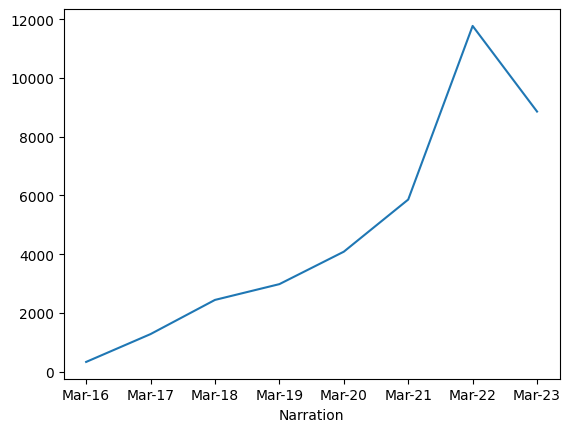

In [92]:
df.loc['Working Capital'].plot()

In [49]:
df.loc['Sales'][0]

'  846.80 '

In [8]:
df = pd.read_excel(f'companies/{files[1]}')

In [9]:
columns = df.columns

In [24]:
columns[df.set_index(columns[0]).loc['Narration'].isna()]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 13

In [23]:
columns[df.set_index(columns[0]).dropna(axis =0, how = 'all').loc['Narration'].isna()]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 14 but corresponding boolean dimension is 13

In [12]:
df.drop(columns[1:3], axis =1)

,FINO PAYMENTS BANK LTD,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,SCREENER.IN,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Narration,NaN,NaN,Mar-18,Mar-19,Mar-20,Mar-21,Mar-22,Mar-23,Trailing,Best Case,Worst Case
2,Sales,NaN,NaN,15.50,19.15,18.13,20.25,35.63,94.86,124.16,252.55,149.07
3,Expenses,-,-,278.83,409.72,690.00,707.42,915.36,"1,075.60","1,202.81",252.55,149.07
4,Operating Profit,-,-,-263.33,-390.57,-671.87,-687.17,-879.73,-980.74,"-1,078.65",-,-
5,Other Income,NaN,NaN,214.68,351.97,673.27,770.77,973.23,"1,135.05","1,220.25",0.0,0.0
6,Depreciation,NaN,NaN,16.09,18.26,23.57,53.58,35.45,41.85,-,-,-
7,Interest,NaN,NaN,2.60,5.53,9.87,9.54,15.31,47.37,62.20,62.20,62.20
8,Profit before tax,NaN,NaN,-67.34,-62.39,-32.04,20.48,42.74,65.09,79.40,-62.20,-62.20
9,Tax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,0%,0%
